In [4]:
from main import *

In [5]:
X = data.iloc[:, :-1].to_numpy()
y = [to_int(i) for i in data.iloc[:, -1].values]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14)

In [35]:
res = {}
for i in gen_comb(n_neighbors=range(1, 50)):
    knn = KNeighborsClassifier(n_neighbors=i[0], n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
#     print(f"Конфигурация[n_neighbors={i[0]}] - {np.mean(y_pred == y_test)}")
    res.update({i[0]: np.mean(y_pred == y_test)})

/home/sergey/PycharmProjects/sherban_labs/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'n_neighbors'), Text(0, 0.5, 'accuracy')]

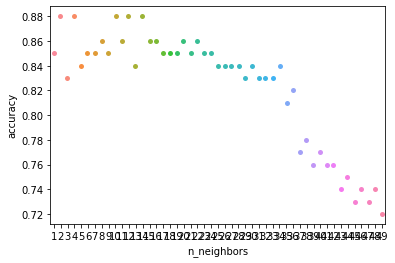

In [38]:
ax = sns.stripplot(list(res.keys()), list([round(i, 2) for i in res.values()]))
ax.set(xlabel ='n_neighbors', ylabel = 'accuracy')

In [47]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

scores = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv=2)
print(np.round(100*np.mean(scores), 1), "%")

print("Разница между прогнозами на тестовой выборке и валидации:", 
      np.round(100*np.mean(y_pred == y_test) - 100*np.mean(scores), 1), "%")

86.6 %
Разница между прогнозами на тестовой выборке и валидации: 0.9 %


In [53]:
X_bad = list(map(lambda el: list(map(lambda y: y if (list(el).index(y) % 2 == 0) else y / 10, el)), X_train))
X_bad_test = list(map(lambda el: list(map(lambda y: y if (list(el).index(y) % 2 == 0) else y / 10, el)), X_test))
X_bad = np.array(X_bad)
X_bad_test = np.array(X_bad_test)

knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knn.fit(X_bad, y_train)
y_pred = knn.predict(X_bad_test)
print(np.round(100*np.mean(y_pred == y_test), 1))

90.9


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()
scaler.fit(X_train)
train = scaler.transform(X_train)
scaler.fit(X_test)
test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knn.fit(train, y_train)
y_pred = knn.predict(test)
scores = cross_val_score(knn, train, y_train, scoring = 'accuracy', cv=2)

# print(np.round(100*np.mean(y_pred == y_test), 1))
print(scores)

[0.86259542 0.88549618]
